In [90]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [91]:
from sklearn.model_selection import train_test_split
import os
import glob
import json

In [92]:
dir_originImage = 'Unity_dataset/RGB'
dir_mask = 'Unity_dataset/SemanticSegmentation'
annot_dir = 'Unity_dataset/Dataset/annotation_definitions.json'

In [93]:
f = open(annot_dir)
data = json.load(f)

In [94]:
list(data.keys())[1]

'annotation_definitions'

In [95]:
data[list(data.keys())[1]][1]['spec']

[{'label_name': 'unlabeled',
  'pixel_value': {'r': 0.0, 'g': 0.0, 'b': 0.0, 'a': 1.0}},
 {'label_name': 'ego vehicle',
  'pixel_value': {'r': 0.003921568859368563,
   'g': 0.003921568859368563,
   'b': 0.003921568859368563,
   'a': 1.0}},
 {'label_name': 'rectification border',
  'pixel_value': {'r': 0.007843137718737125,
   'g': 0.007843137718737125,
   'b': 0.007843137718737125,
   'a': 1.0}},
 {'label_name': 'out of roi',
  'pixel_value': {'r': 0.0117647061124444,
   'g': 0.0117647061124444,
   'b': 0.0117647061124444,
   'a': 1.0}},
 {'label_name': 'static',
  'pixel_value': {'r': 0.01568627543747425,
   'g': 0.01568627543747425,
   'b': 0.01568627543747425,
   'a': 1.0}},
 {'label_name': 'dynamic',
  'pixel_value': {'r': 0.019607843831181526,
   'g': 0.019607843831181526,
   'b': 0.019607843831181526,
   'a': 1.0}},
 {'label_name': 'ground',
  'pixel_value': {'r': 0.0235294122248888,
   'g': 0.0235294122248888,
   'b': 0.0235294122248888,
   'a': 1.0}},
 {'label_name': 'road',
  

In [96]:
data[list(data.keys())[1]][1]['spec'][0]['pixel_value']['r']

0.0

In [120]:
df = pd.DataFrame(data = data[list(data.keys())[1]][1]['spec'])

In [131]:
new_dict = {}
df = pd.DataFrame(columns=['label','r','g','b'])
df

,label,r,g,b


In [132]:
for i in data[list(data.keys())[1]][1]['spec']:
    new_dict['label'] = i['label_name']
    new_dict['r'] = [int(i['pixel_value']['r']*255)]
    new_dict['g'] = [int(i['pixel_value']['g']*255)]
    new_dict['b'] = [int(i['pixel_value']['b']*255)]
    df = pd.concat([df,pd.DataFrame(new_dict)])

In [133]:
df = df.reset_index()[df.reset_index().columns[1:]]

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   35 non-null     object
 1   r       35 non-null     object
 2   g       35 non-null     object
 3   b       35 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [135]:
df

,label,r,g,b
0,unlabeled,0,0,0
1,ego vehicle,1,1,1
2,rectification border,2,2,2
3,out of roi,3,3,3
4,static,4,4,4
5,dynamic,5,5,5
6,ground,6,6,6
7,road,7,7,7
8,sidewalk,8,8,8
9,parking,9,9,9


In [136]:
seg1 = plt.imread(glob.glob(dir_mask+'/*')[0])*255
seg1.shape

(527, 937, 4)

In [137]:
seg1[]

SyntaxError: invalid syntax (3050152115.py, line 1)

In [138]:
seg2 = cv2.imread(glob.glob(dir_mask+'/*')[0])
seg2

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7],
        ...,
        [7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]],

       [[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7],
        ...,
        [7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]],

       [[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7],
        ...,
        [7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]]], dtype=uint8)

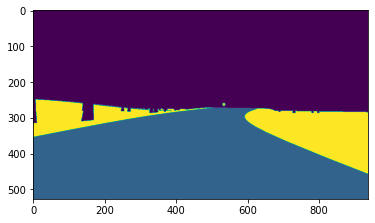

In [139]:
plt.imshow(seg2[:,:,1])